# Time Series Analysis in Python

## Chapter 1: Correlation and Autocorrelation

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
diet = pd.read_csv("diet.csv", index_col=0)
diet

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72
...,...
5/22/2016,62
5/29/2016,62
6/5/2016,62


In [3]:
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)
diet

,diet
Date,
2011-06-26,70
2011-07-03,71
2011-07-10,73
2011-07-17,74
2011-07-24,72
...,...
2016-05-22,62
2016-05-29,62
2016-06-05,62


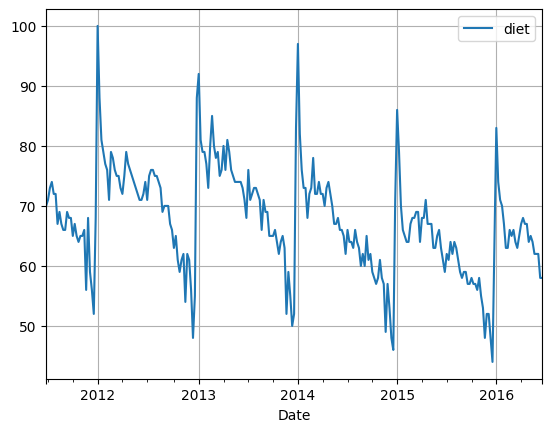

In [4]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

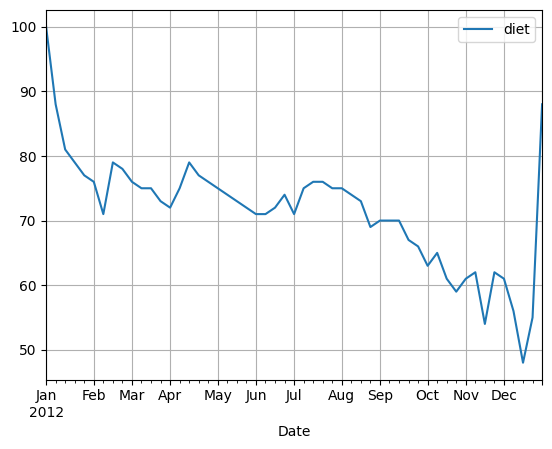

In [5]:
# Slice the dataset to keep only 2012
diet2012 = diet[diet.index.year==2012]

# Plot 2012 data
diet2012.plot(grid = True)
plt.show()

In [6]:
stocks = pd.read_csv("stocks.csv", index_col=0)
stocks

,SP500
observation_date,
2007-06-11,1509.12
2007-06-12,1493.00
2007-06-13,1515.67
2007-06-14,1522.97
2007-06-15,1532.91
...,...
2017-06-05,2436.10
2017-06-06,2429.33
2017-06-07,2433.14


In [7]:
bonds = pd.read_csv("bonds.csv", index_col=0)
bonds

,US10Y
observation_date,
2007-06-08,5.12
2007-06-11,5.14
2007-06-12,5.26
2007-06-13,5.20
2007-06-14,5.23
...,...
2017-06-02,2.15
2017-06-05,2.18
2017-06-06,2.14


In [8]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how = "inner")

{'2010-10-11', '2009-10-12', '2015-10-12', '2016-10-10', '2007-10-08', '2016-11-11', '2012-10-08', '2007-11-12', '2012-11-12', '2009-11-11', '2010-11-11', '2011-11-11', '2011-10-10', '2014-10-13', '2014-11-11', '2013-10-14', '2015-11-11', '2008-10-13', '2017-06-09', '2008-11-11', '2013-11-11'}


Correlation of stocks and interest rates:  0.4119448886249271


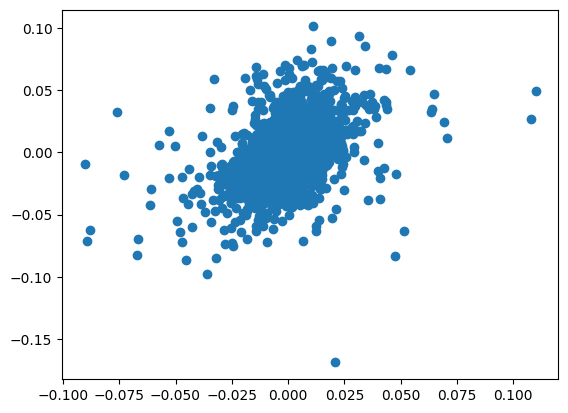

In [9]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns["SP500"].corr(returns["US10Y"])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns["SP500"], returns["US10Y"])
plt.show()

In [10]:
dji = pd.read_csv("DJI.csv", index_col=0)
ufo = pd.read_csv("UFO.csv", index_col=0)

levels = pd.merge(
    dji,
    ufo,
    how="inner",
    left_index=True,
    right_index=True
)

levels.columns = ["DJI", "UFO"]
levels

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9
...,...,...
2009,10428.05,4541
2010,11577.51,4283
2011,12217.56,5107


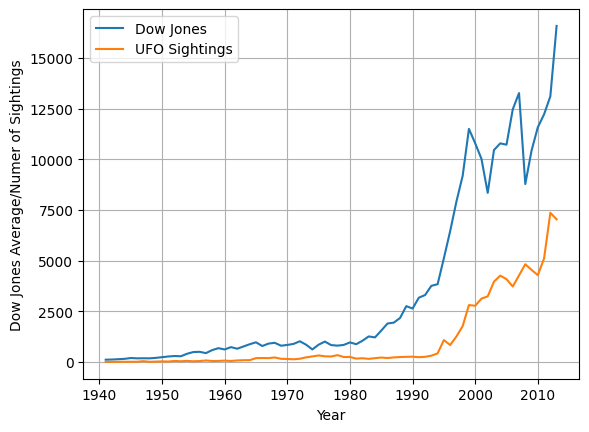

In [11]:
fig, ax = plt.subplots()

ax.plot(levels.index, levels["DJI"], label="Dow Jones")
ax.plot(levels.index, levels["UFO"], label="UFO Sightings")
ax.set(
    xlabel= "Year",
    ylabel="Dow Jones Average/Numer of Sightings"
)
ax.grid()
ax.legend()
plt.show()

In [12]:
# Compute correlation of levels
correlation1 = levels["DJI"].corr(levels["UFO"])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes["DJI"].corr(changes["UFO"])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


Correlation on levels is high but the correlation on changes is close to zero.

In [13]:
df_x = pd.read_csv("x.csv", index_col=0, header=None).reset_index(drop=True)
x = df_x[1]
x

0      1.281155
1     -0.612631
2      0.933222
3      2.269327
4     -1.427691
         ...   
995    1.089032
996    0.743692
997   -1.611570
998    1.011224
999    1.571971
Name: 1, Length: 1000, dtype: float64

In [14]:
df_y = pd.read_csv("y.csv", index_col=0, header=None).reset_index(drop=True)
y= df_y[1]
y

0     -0.835129
1     -0.061004
2     -0.194677
3     -2.461142
4      1.040073
         ...   
995   -1.017080
996   -0.430943
997    1.989779
998   -1.171907
999   -1.565902
Name: 1, Length: 1000, dtype: float64

In [15]:
# Compute correlation of x and y
correlation = x.corr(y)
print(f"The correlation between x and y is {correlation:4.2f}")

The correlation between x and y is -0.90


In [16]:
# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=[1])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:51:57   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.013     -0.391      0.6

In [17]:
MSFT = pd.read_csv("MSFT.csv", index_col=0)
MSFT.index = pd.to_datetime(MSFT.index)
MSFT

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351
...,...
2017-07-31,72.699997
2017-08-01,72.580002
2017-08-02,72.260002


Autocorrelation:
- Mean reverting: Negative autocorrelation
- Trend following - Positive autocorrelation

In [18]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule="W").last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns["Adj Close"].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


Autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'.

In [19]:
daily_rates = pd.read_csv("daily_rates.csv", index_col=0)
daily_rates.index = pd.to_datetime(daily_rates.index)
daily_rates

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2017-06-15,2.16
2017-06-16,2.16
2017-06-19,2.19


In [20]:
# Compute the daily change in interest rates
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff["US10Y"].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule = "A").last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff["US10Y"].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22
